<a href="https://colab.research.google.com/github/MaralAminpour/ML-BME-Course-UofA-Fall-2023/blob/main/Week-6-PCA/PCA_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality reduction

Let's get started on how these neat concepts can be used for dimensionality reduction, especially with Principal Component Analysis (PCA). And guess what? We'll also explore how to practically bring PCA to life using scikit-learn. Excited? Let's jump in!

## When to Use PCA?

High-dimensional data is a common issue experienced in machine learning practices, as we typically feed a large amount of features for model training. This results in the limitation of models having **less interpretability and higher complexity** - also known as the curse of dimensionality.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/imgs_week4_clustering_PCA/curse.png' width=500px >


PCA can be beneficial when the dataset is **high-dimensional (i.e. contains many features)** and it is widely applied for dimensionality reduction.

Additionally, PCA is also used for discovering the **hidden relationship among feature variables** and **reveal underlying patterns** that could be very insightful. PCA attempts to find linear components that capture as much variance in the data as possible. And **the first principal component (PC1) is typically composed of features that contributes most to the model predictions.**

## How Does PCA Work?

Think of PCA (Principal Component Analysis) as a way to simplify a lot of data. Here's how it works in simple terms:

1. We try to understand how different parts of our data change together using something called a "covariance matrix."

2. We then find some special directions (called "eigenvectors") where the data changes the most.

3. These special directions help us represent our big, complicated data in a simpler way.

Now, terms like "covariance matrix" and "eigenvector" might sound fancy. But they're just tools to help us **see our data in a clearer way. So, instead of thinking about them as tricky math things, picture them as cool visual changes to our data. It makes understanding everything a whole lot easier**!

You might remember us chatting about how matrices can be used in math operations, like the dot product. But did you know they can also show us cool visual changes? Let's break it down:

Imagine a 2x2 grid or a tiny chessboard. This is our matrix. If you slice it down the middle, you get two lists (we call them vectors). The list on the left is like our horizontal ruler (x-axis), and the one on the right is our vertical ruler (y-axis). Together, they help create a mini world of a 2D space.

Now, there's a special matrix called the "identity matrix". It has [1,0] for the horizontal ruler and [0,1] for the vertical one. The cool thing about it? If you mix any list (vector) with this special matrix, you get the same list back!


<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/imgs_week4_clustering_PCA/matrix1.png.webp' width=500px >

Matrix transformation boils down to shifting the scale and direction of the x-axis and y-axis. Imagine the x-axis and y-axis as stretchy rubber bands on a plane. Matrix transformation is like pulling or twisting these bands in different ways.

Let's say you tug the x-axis rubber band to make it twice as long. What you're doing is changing its basic direction from [1,0] to [2,0]. This means everything on that axis gets stretched out and becomes double its original size!

**In short, playing around with matrices is like giving a new look to our familiar x and y axes.**

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/imgs_week4_clustering_PCA/matrix2.png.webp' width=500px >

We can additionally combine both the x-axis and y-axis for more **complicated scaling, rotating or shearing transformation**. A typically example is the **mirror matrix** where we swap the x and y axis. For a given vector [1,2], we will get [2,1] after the mirror transformation.

Alright, let's jazz things up a bit. We can **play with both the x-axis and y-axis together** for some cool effects like stretching, spinning, or even skewing!

Ever played with a mirror? Well, matrices can do something similar. Imagine a matrix that acts like a mirror, **flipping the x and y axes.** So, if you had a point at [1,2], after using our "mirror" matrix, it'll land at [2,1]. It's like giving the point a fun house mirror effect!

In simple words, with matrices, we can create all sorts of fun and funky changes to our points.

If you would like to practice these transformations in python and skip the manual calculations, we can use following code to perform these dot products and visualize the result of the transformation using plt.quiver() function.

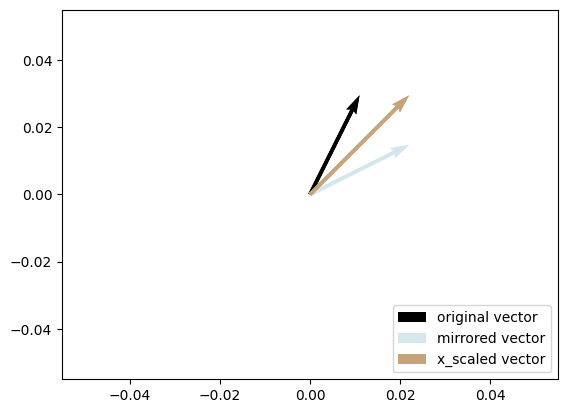

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define matrices and vector
x_scaled_matrix = np.array([[2,0],[0,1]])
mirror_matrix = np.array([[0,1],[1,0]])
v = np.array([1,2])

# matrix transformation
mirrored_v = mirror_matrix.dot(v)
x_scaled_v = x_scaled_matrix.dot(v)

# plot transformed vectors
origin = np.array([[0, 0], [0, 0]])
plt.quiver(*origin, v[0], v[1], color=['black'],scale=10, label='original vector')
plt.quiver(*origin, mirrored_v[0], mirrored_v[1] , color=['#D3E7EE'], scale=10, label='mirrored vector' )
plt.quiver(*origin, x_scaled_v[0], x_scaled_v[1] , color=['#C6A477'], scale=10, label='x_scaled vector')
plt.legend(loc ="lower right")

## Covariance Matrix: The Heartbeat of PCA!

*In Short: covariance matrix represents the pairwise correlations among a group of variables in a matrix form.*

Covariance matrix is another critical concept in PCA process that represents the data variance in the dataset. To understand the details of covariance matrix, we firstly need to know that **covariance measures the magnitude of how one random variable varies with another random variable.** For two random variable x and y, their covariance is formulated as below and higher covariance value indicates stronger correlation between two variables.

let's chat about something called the "covariance matrix." Think of it as a magical table that tells us **how different pieces of our data move together**. It's super important for the PCA process because it captures the heartbeat (or **variance) of our dataset**.

Now, let's break down "covariance" a bit. Imagine you and your friend are dancing. Sometimes you both move **in sync**, sometimes in **opposite directions**, and sometimes **there's no connection** at all in your dance moves. Covariance is like a scorecard that tells you **how in-sync (or not) your dance moves are**!

If we want to get a bit technical, for two dancers (or random variables) x and y, their dance score (or covariance) can be calculated using a formula. A higher score means you both are more in tune with each other's moves. **In data terms, a higher covariance value indicates a stronger connection or correlation between two variables.**

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/imgs_week4_clustering_PCA/matrix5.png.webp' width=300px >




## Covariance Matrix: The Relationship Checker

When given a set of variables (e.g. x1, x2, ... xn) in a dataset, covariance matrix is typically used for representing the **covariance value between each variable pairs in a matrix format**.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/imgs_week4_clustering_PCA/matrix6.png.webp' width=400px >


Imagine you have a bunch of friends: x1, x2,... xn. Some of these friends are super close and always hang out together, while others might not get along that well. Now, if you wanted to map out how close each friend is to every other friend, that's where the covariance matrix comes into play!

Think of the covariance matrix as a big chart. Each row and column represents one of your friends. The chart then tells you the "closeness score" between each pair of friends. If x1 and x2 are always together, there'll be a high score in the box where their row and column meet. If they aren't close, the score will be lower.

In simple terms, the covariance matrix helps us see the relationship strength between each pair of variables (or friends) in our dataset. It's like a big friendship chart for data!



## Covariance Matrix: The Trend Magnifier

Multiplying the covariance matrix will transform any vector towards the **direction that captures the trend of variance in the original dataset.**

let's think of the covariance matrix as a special pair of glasses. When a vector (let's call it a "light beam") passes through these glasses, it gets bent or shifted towards the main trend or direction of our data.

So, if our data has a trend where, let's say, things generally increase, our vector or "light beam" will also point in that increasing direction after passing through our **covariance matrix glasses**.

In simpler words, multiplying by the covariance matrix is like using a tool that emphasizes **the main story or trend in our data**. It's helping highlight **where most of the action is happening!**

Let us use a simple example to simulate the effect of this transformation. Firstly, we randomly generate the variable x0, x1 and then compute the covariance matrix.

In [ ]:
# generate random variables x0 and x1
import random
x0 = [round(random.uniform(-1, 1),2) for i in range(0,100)]
x1 = [round(2 * i + random.uniform(-1, 1) ,2) for i in x0]

# compute covariance matrix
X = np.stack((x0, x1), axis=0)
covariance_matrix = np.cov(X)
print('covariance matrix\n', covariance_matrix)

covariance matrix
 [[0.32098307 0.61989966]
 [0.61989966 1.55759817]]


**What Does This Code Do When Run?**

When you run the code:
- Two lists of 100 numbers each, `x0` and `x1`, are generated. `x0` has random values between -1 and 1, while `x1` is derived from `x0` but with added variability.
- The covariance matrix of these two lists is computed and printed. This matrix provides insights into the relationship between the two lists, specifically how changes in one list correspond to changes in the other.

We then transform some random vectors by taking the dot product between each of them and the covariance matrix.

(-2.5, 2.5)

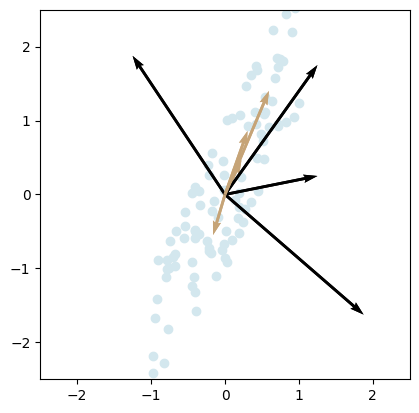

In [ ]:
# plot original data points
plt.scatter(x0, x1, color=['#D3E7EE'])

# vectors before transformation
v_original = [np.array([[1,0.2]]), np.array([[-1,1.5]]), np.array([[1.5,-1.3]]), np.array([[1,1.4]])]

# vectors after transformation
for v in v_original:
    v_transformed = v.dot(covariance_matrix)
    origin = np.array([[0, 0], [0, 0]])
    plt.quiver(*origin, v[:, 0], v[:, 1], color=['black'], scale=4)
    plt.quiver(*origin, v_transformed[:, 0], v_transformed[:, 1] , color=['#C6A477'], scale=10)

plt.axis('scaled')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])

Original vectors prior to transformation are in black, and after transformation are in brown. As you can see, the original vectors that are pointing at different directions have become more conformed to the general trend displayed in the original dataset (i.e. the blue dots). Because of this property, covariance matrix is important to PCA in terms of describing the relationship between features.

Imagine a scatter plot filled with blue dots, representing our original dataset. These dots are scattered, showing various patterns and relationships.

Now, picture a few black arrows (our original vectors) scattered on the same plot. They're pointing in different directions, representing various patterns within the data.

Enter the magic of the covariance matrix!

After passing these black arrows through the transformation of the covariance matrix, they change into brown arrows. These brown arrows now more closely follow the main pattern or trend that the blue dots are showing. **Instead of being scattered randomly, they align or "conform" better to the general direction that most of the blue dots are heading towards.**

This ability of the covariance matrix to align vectors with the core trends of the data is why it's so crucial in PCA. By understanding and capturing these main trends (or relationships between features), **PCA can represent the essence of the data in fewer dimensions, making our analyses more focused and efficient.**

So, in essence, the covariance matrix acts like a guide, helping PCA spotlight the major patterns and relationships in the data. It's like turning those scattered black arrows into coordinated brown arrows that march in line with where the data is leading them!

## Eigenvalue and Eigenvector

*In Short: Eigenvector (v) of a matrix (A) remains at the same direction after the matrix transformation, hence Av = λv where v represents the corresponding eigenvalue. Representing data using eigenvector and eigenvalue reduces the dimensionality while maintaining the data variance as much as possible.*

To make this idea clearer, let's look at an easy-to-follow example. Say we have a matrix [[0,1],[1,0]]. One of its special vectors, called an eigenvector, is [1,1], and it has a matching value, known as an eigenvalue, of 1.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/imgs_week4_clustering_PCA/matrix8.png.webp' width=300px >

let's see what's happening with our special matrix: [[0,1],[1,0]]. This matrix is like a magic mirror. When a vector looks into it, its x and y coordinates get swapped around.

Let's use our vector [1,1] as an example. When it looks in this "mirror", its reflection is... itself! The x and y coordinates don't really change. This is why it's a special vector for our matrix, or what we call an "eigenvector".

Now, the "eigenvalue" of 1 is like a size tag. It tells us that our vector, after transformation, remains the same size and points in the same direction. No stretching or squishing happens.

What's super cool is this: instead of using a full-blown matrix to talk about changes, we can use just a single number, the eigenvalue, to summarize the transformation's effect. This eigenvalue is a powerful indicator. It tells us how much of the original data's patterns or "variance" is captured by our eigenvector.

Now, to visualize this, imagine a scatter plot filled with blue dots showing our data spread. Add in our special vector, the eigenvector, as a big red arrow. You'll notice that this red arrow aligns beautifully with the main trend in our data. It's like the backbone, showing where most of the action is happening!

In coding terms, we could use a script to draw this picture, highlighting the dominant eigenvector in vibrant red, revealing its alignment with the data's primary direction or variance. It's all about making the abstract concrete and visual!



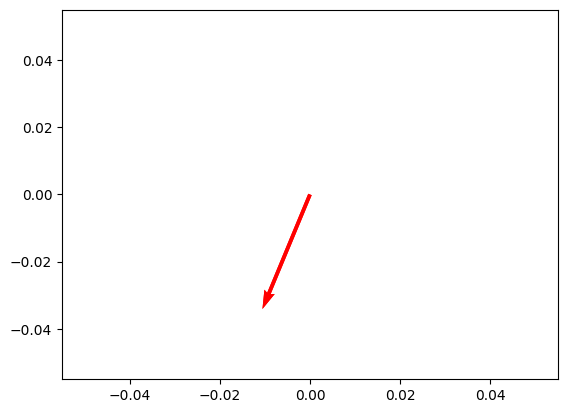

In [ ]:
from numpy.linalg import eig
eigenvalue,eigenvector = eig(covariance_matrix)
plt.quiver(*origin, eigenvector[:,1][0], eigenvector[:,1][1] , color=['red'], scale=4, label='eigenvector')

## Principal Components

Making Sense of Data Magic with PCA!

Okay, let’s piece this puzzle together!

1. **Covariance Matrix Magic**: Remember our fancy table, the covariance matrix? It shows how different parts of our data move together. Especially useful when we have lots of variables!

2. **Eigenvectors - The Heroes**: These special vectors (eigenvectors) have a knack for capturing the main patterns in data but in a simpler, less cluttered way.

3. **Eigenvalues - The Power Meters**: Each eigenvector has a buddy called an eigenvalue. This buddy tells us how strong or influential its corresponding eigenvector is.

Now, when we mix the covariance matrix with these eigenvectors and eigenvalues, magic happens!

**Enter Principal Components (PCs)**:
Think of PCs as the all-stars team of eigenvectors. When we calculate the eigenvectors for our covariance matrix, we get these PCs. And just like in sports, there's a ranking!

- **PC1**: The top player. The eigenvector with the highest eigenvalue. This is the one that captures the biggest trends in our data. If our data were a story, PC1 would be the headline!
  
- **PC2, PC3, ... PCn**: The supporting cast. They also capture important patterns but maybe not as prominently as PC1.

Remember that red vector in the image? That's our superstar, PC1. It's showing the main direction where our data has the most action.

**Why Does This Matter?**
Let's say we want a simpler view of our data without losing too much detail. We'd pick the top PCs (like PC1, PC2) because they hold the most information about the original data, thanks to their high eigenvalues.

In short, PCA is like a clever camera that captures the essence of our data using fewer, but super informative, shots!

## PCA Implementation in Machine Learning



## Take-Home Message

In the previous article, we have introduced using linear algebra for data representation in machine learning. Now we introduced another common use case of linear algebra in ML for dimensionality reduction - Principal Component Analysis (PCA). We firstly discussed the theory behind PCA:

1. represent the data variance using covariance matrix

2. use eigenvector and eigenvalue to capture data variance in a lower dimension

3. The principal component is the eigenvector and eigenvalue of the covariance matrix

Furthermore, we utilize scikit-learn to implement PCA through the following procedures:

1. standardize data into the same scale

2. apply PCA on the scaled data

3. visualize explained variance using scree plot

4. interpret the principal components composition

5. use principal components in ML algorithm

**Very intresting article on PCA**

[Are you googling PCA again?](https://lazymodellingcrew.com/post/post_17_are_you_googling_pca_again/)

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/beer_vodka.png' width=400px >


---




source: [Linear Algebra for ML Part 2 | Principal Component Analysis](https://www.visual-design.net/post/linear-algebra-for-ml-part2-principal-component-analysis)

## PCA

Let's kick things off by chatting about manifold learning. You know, today's medical imaging datasets? They're huge! Think about a single magnetic resonance brain volume. One of those images, on a typical grid, can have a resolution like 255 by 255 by 180. That's a lot, right?

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/film1.png' width=400px >


back of envelope calculation:
Typical brain image size is 255 × 255 × 180, which equals 11,704,500 voxels. Woah!
If we're talking about 100 images in our dataset, just imagine the size of our data matrix X. Massive!
Manifold learning: why do we need it?
If we're counting every data point as a unique feature, that's a whopping 11 million features for just one image! But here's the catch: getting MRI scans is pricey, so getting millions of them? Not likely. So, what we end up with is datasets with way more features than actual examples. This gets tricky. Why? Because as we pile on more dimensions, our data kinda starts getting lost in all that space. This is what folks call the "curse of dimensionality".

## Adding more dimensions

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/film7.png' width=400px >


So, why manifold learning? Well:

- When we add more dimensions, our data **gets spread thin**.

- Imagine a **grid** that keeps expanding with **every added dimension**. It's growing at an insane rate.

- The more spaced out our data, the easier it might be to mistakenly find a gap or separator in the data.

## The curse of dimensionality

Why is this problematic?

Let's think about trying to **create a gender classifier based on stereotypes**. Let's paint a picture here. Say we give a computer details about **11 people**:
- their height,
- hair length,
- shoe size, and
- their favorite sport, book, or movie.

**Our goal?** To see if it **can guess who's male or female**.

If we just look at height, it's doing okay. So, if we base a **binary gender prediction** **solely on heigh**t, we might get results that seem better than random guessing. For instance, if we label gender based on whether someone is taller or shorter than 170 centimeters, we get the following results:

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/film9.png' width=400px >

- **5 out of 6** girls are labeled correctly.
- 3 out of 5 boys are labeled correctly.
- In total, 8 out of 11 people are labeled correctly, which is a **72.7% accuracy**.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/film2.png' width=400px >


At first glance, this might seem like a decent approach. For instance, imagine giving a computer details about 11 people, such as their height, hair length, shoe size, and favorite sport, book, or movie. Then, we ask the computer to guess who is male or female. If we only use height as the determining factor, we get the 72.7% accuracy mentioned earlier.

**But what if we added more features to improve our predictions?** Let's consider hair length as an additional feature. While this might not be **as reliable**, in this sample, **girls generally have longer hair**, with a few exceptions. If we use both **height and hair length** to make our predictions, drawing a line to differentiate between the two groups, **we see that above the line are mostly girls and below the line are boys**. With this approach, we correctly classify four out of six girls and all five boys, giving us an **accuracy of 82%**. So, this method could be a potential stopping point.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/film3.png' width=400px >

**But what if we continued to refine our model by adding more questions?** Suppose we delve deeper into stereotypes and consider **favorite film genres**. In this sample, the top group might prefer romance, the middle group leans towards comedies, and, interestingly, one woman in the lower group favors horror movies.

**It seems like we've hit the jackpot with everyone correctly classified, right?** Wrong.

What we've done is overfit our model to our specific dataset.

Without adding new data points and continually refining our criteria, we're likely just finding patterns by pure coincidence. Let's stay on the stereotype path: imagine we added **a biker and some Goths**, who, predictably, enjoy horror movies. Then there's a hippie who loves romance and a group of girls who, unsurprisingly, like comedies. Now, when we test our refined model, its **accuracy has dropped to 61%**.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/film4.png' width=400px >

**In conclusion, when your model has significantly more features than samples, the curse of dimensionality can lead to easy overfitting**. Overfitting, as discussed in week two, occurs when a model is **excessively parametrized**, providing it with too many degrees of freedom. This is precisely the case here. By equipping the model with an abundance of features or parameters, it becomes overly adaptable to the data's noise.

## How can Manifold learning help?

So, how does manifold learning come into play? In real-world scenarios, datasets stemming from biological or physical processes often **operate within a restricted range of freedom or dimensionality.** This limitation mirrors the **physical laws governing their formation**. For instance, consider a sequence of photos stitched together to create a **panoramic view**. While each photo might have a resolution of **16 megapixels**, making it seem challenging for a machine to determine overlapping points, the act of capturing these photos is bound by **three dimensions**: the camera's **pitch, roll, and yaw**. Therefore, the data points inherently exist in a dimensionality that's notably less expansive than it appears, albeit slightly more than 3D due to factors like encoding variations and lighting differences.

**NOTE:** When we talk about "datasets stemming from biological or physical processes," we're referring to information that arises from natural phenomena. These could be anything from the way a plant grows, the path a planet takes around a sun, to the manner in which our heartbeats fluctuate.

The **"restricted range of freedom or dimensionality"** bit is really about simplicity at the heart of complexity. **Even if we gather massive amounts of data about a particular phenomenon, the underlying patterns or rules governing that data might be surprisingly straightforward**.

Think about it like this: imagine you're watching a swarm of birds in the sky, making intricate patterns. If you tried to track the path of **every single bird**, it'd be incredibly complex. But, if you understood a few simple rules about how birds react to their neighbors, you could predict the swarm's patterns. That’s the "restricted range" in action. **The countless individual bird movements (high dimensionality) can be understood with a few simple rules (low dimensionality)**.

The reason this happens is because of "physical laws governing their formation." In our bird example, those laws might include aerodynamics, the bird’s instinctual behavior, and so on. In other cases, it might be laws of physics, chemistry, or biology. These laws provide a framework or a set of rules that the process has to follow, which often simplifies the underlying patterns we see in the data.

**In essence, even in the face of overwhelming data and complexity, nature often operates on a few basic principles, making things much more manageable and understandable than they first appear!**

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/film6.png' width=300px >


Real-world data, like the countless photos you take, isn't scattered randomly. It's molded by natural rules and processes, which often restrict its complexity. So, you know how manifold learning sounds all fancy and complex? Let's break it down a bit. Imagine you're taking a bunch of photos to make one of those cool panoramic shots. Each photo is super detailed with 16 megapixels. Now, you might think, "Gosh, how does a computer figure out where these photos overlap? Even though each photo brims with 16 million pixels, **there's an underlying pattern**. The act of taking these photos is akin to a dance with three moves: the tilt (pitch), the side-to-side sway (roll), and the spin (yaw) of the camera. These constraints mean that, despite the apparent complexity of millions of pixels, **the real challenge is understanding this 3D dance**. Consecutive photos will be super similar, making the task much more manageable. The beauty of it all? **By recognizing and exploiting this underlying structure or geometry, we can simplify tasks that might initially seem daunting**. And that's the magic behind it – finding simplicity within a sea of data.

## Model of breathing

Consider the model of breathing. Though it might seem like a process **involving millions of data points**, it's not quite that complex. Take, for instance, the task of **piecing together snapshots** or MRI volumes captured at varying moments in the breathing cycle. The fascinating thing is, **these innumerable data points can be boiled down to a representation in just two dimensions**. When mapped, neighboring points on this 2D plane **symbolize consecutive volumes in the time sequence**.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/breathing.gif' width=400px >

## Swiss roll toy model

A classic way to visualize **how data in lower dimensions can be wrapped in higher dimensions** is the Swiss roll toy model. Envision a flat 2D sheet, which is then curled up to form a 3D shape. This vividly illustrates a scenario where we know the data originates from a 2D plane but is presented in a 3D space. Interesting, right?

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/swiss_roll.png' width=400px >


## Swiss Roll Model

The Swiss roll model is a popular toy dataset used to illustrate the concept of manifold learning. Imagine a flat, rectangular sheet of paper. If you roll this paper into a **cylindrical shape**, you've essentially created a one-dimensional manifold in a two-dimensional space. Now, if you roll this cylinder in a spiral shape (like a rolled cake or a "Swiss roll"), you get a **two-dimensional manifold embedded in a three-dimensional space**.

The key idea here is that **even though the Swiss roll exists in a three-dimensional space, the data on the roll itself is intrinsically two-dimensional**. If you were an ant walking on the surface of the roll, you would perceive only two dimensions, even though your path might look complex in the 3D space.


## So, what do non-linear manifold learning techniques do?

When we measure the straight-line (or Euclidean) distances between data points, it doesn't always represent the true relationships, especially on curvy surfaces or manifolds. For example, as depicted, this straight-line approach might take shortcuts across what's really a winding path on a 2D surface. So, what do non-linear manifold learning techniques do? **They aim to uncover the genuine, low-dimensional space by focusing on local neighborhoods rather than just straight-line distances.**

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/ecludian.png' width=500px >

But before diving deep into non-linear techniques, we need to touch on linear manifold learning. You might be wondering what distinguishes the two. In simple terms, linear methods try to keep the **straight-line geometry by focusing on a direct subspace of the data**. In contrast, non-linear methods add a twist by adapting the geometry in various ways. **Their main strategy?** Pay close attention to the local surroundings of each data point. Cool, huh?

# Manifold

In English, outside of the mathematical context, "manifold"  describe something as having many different forms or being varied in nature.
Example: "The reasons for his decision are manifold."


A "manifold" is a mathematical concept used in various fields, such as **differential geometry and topology**. At its core, a manifold is a space that locally resembles Euclidean space (like a line, plane, or higher-dimensional analogs) but can have a more complex global structure.

Certainly! Let's break down the concept of a manifold, especially in the context of differential geometry and topology.

### Differential Geometry and Topology

**Differential Geometry** and **Topology** are two branches of mathematics that study the properties and behaviors of "spaces" or "shapes." While they overlap in many ways, they have different emphases:

- **Differential Geometry** deals with the properties and structures of manifolds that require the concept of a derivative, like curvature. It often uses calculus to study the geometry of curves, surfaces, and their higher-dimensional analogs.

- **Topology** is concerned with the properties of space that are preserved under continuous deformations, like stretching, crumpling, and bending, but not tearing or gluing. It doesn't care about exact distances or angles but instead focuses on broader properties.

### Manifold in Depth

When we say a manifold is a space that "locally resembles Euclidean space," we're drawing a distinction between **local properties** (what things look like up close) and **global properties** (what things look like from a distance or in their entirety).

1. **Locally Resembles Euclidean Space**:
    - For any point on a manifold, if you zoom in closely enough, that tiny region will look like a flat Euclidean space.
    - For a 1-dimensional manifold (like a curve), local regions look like straight lines.
    - For a 2-dimensional manifold (like a surface), local regions look like flat planes.
    - This idea extends to higher dimensions.

2. **Complex Global Structure**:
    - While the local view of a manifold might be simple, the overall shape or structure can be more complicated.
    - Consider the Earth's surface. If you stand in a field and look around, the ground appears flat (like a 2D plane). However, globally, we know the Earth is a sphere.

### Examples to Illustrate the Concept:

1. **Circle**:
    - Locally: Any small segment of a circle looks like a straight line (1D Euclidean space).
    - Globally: The entire shape is a circle, not a straight line.

2. **Surface of a Doughnut (Torus)**:
    - Locally: If you inspect a tiny patch, it looks like a flat plane (2D Euclidean space).
    - Globally: The entire shape is a torus, which has a hole in the middle and is more complex than a flat plane.

3. **Mobius Strip**:
    - Locally: A tiny section appears as a 2D plane.
    - Globally: It has a unique property where if you travel along its surface, you'll end up on the opposite side without lifting your finger. This non-orientable property makes it different from regular surfaces.

**Non-Examples**

The Union of a Line and a Point not on the Line: This isn't a manifold because the point where the line and the point meet doesn't look like a line or a plane.
The Union of Two Intersecting Lines: This also isn't a manifold because the point of intersection doesn't have a local structure that looks like a line or a plane.

In essence, manifolds help mathematicians generalize ideas from familiar Euclidean spaces (like lines and planes) to more complex structures. By understanding things locally, we can use tools from calculus (in differential geometry) and study properties preserved under deformation (in topology) to gain insights into these more intricate spaces.

**Intuitive Understanding**

Imagine you're an ant walking on the surface of an object. If, from your tiny perspective, every small patch of the surface you walk on feels like a flat plane, then that surface is a manifold. Even if the overall shape of the object is curved or twisted, as long as every tiny piece of it looks and feels flat to you, it's a manifold.

## Summary

To sum it up, are vast and multidimensional, often presenting more features than actual data points. This complexity presents a challenge. As dimensions increase, data starts to scatter and thin out across this vast space, raising the odds of accidentally drawing conclusions or overfitting the model. **Enter manifold learning techniques. These tools help by simplifying this high-dimensional data into more manageable forms, or "embeddings**."

There are two main types of manifold learning methods.

1. First, we have linear techniques, like **principal component analysis and independent component analysis**, which we'll delve into this week.

2. Then, we have **non-linear approaches, like Laplacian Eigenmaps**, which we'll explore in week six.

And with that, we've wrapped up our overview of manifold learning's purpose and significance.

## Linear Transformation

**At the heart of grasping linear manifold learning is recognizing the significance of linear transformations.** In this notebook, we'll focus on what linear transformations mean and revisit the concepts of eigenvector decomposition and vector spaces.

Now, breaking it down mathematically, a linear transformation is a special function that **upholds additivity and scalar multiplication, all while maintaining the origin.** This implies that if you take two vectors, sum them up, and then apply the transformation, the outcome would be the same as if you transformed each vector individually and then summed them up. The same rule applies for scalar multiplication, **where the sequence - doing it before or after the transformation - doesn’t change the outcome**.

**But what does this mean in real-world terms?**

Simply put, think of it this way: **when a matrix acts on a vector, that action is a linear transformation**. For instance, imagine we have a 2x2 matrix with values 3 and 1 on its diagonal. When this matrix acts on a vector (X, Y), it shifts that data point to a new position (X', Y'). Here, X' is computed as 3 times X (with no influence from Y), and Y' is just Y. **This essentially means that we've scaled the X direction by threefold.**


A linear transformation, $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$, is a function which satisfies:
- $T(\mathbf{x_1} + \mathbf{x_2}) = T(\mathbf{x_1}) + T(\mathbf{x_2})$ for all $\mathbf{x_1}, \mathbf{x_2} \in \mathbb{R}^n$
- $T(\alpha \mathbf{x}) = \alpha T(\mathbf{x})$ for all $\mathbf{x} \in \mathbb{R}^n$ and $\alpha \in \mathbb{R}$
- Preserves origin
- The action of a matrix on a vector space is a linear transform.
- i.e., consider the action of a matrix on a vector:
$$
\begin{bmatrix}
3 & 0 \\
0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}
=
x \begin{bmatrix}
3 \\
0 \\
\end{bmatrix}
+
y \begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
$$

**Additivity and scalar multiplication are also key properties of linear transformations.**

### Comic time

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/comic.png.webp' width=500px >

## Linear transform of a regular Grid points

If we possess a collection of data points forming a square, and we apply the same transformation matrix to all of them, our **square would be transformed—either stretched or scaled—into a rectangle**. In the context of a given linear transformation, eigenvectors are characterized as **the directions that stay consistent**, **only differing by a scaling factor after the transformation is applied**.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/linear_transform.png' width=600px >

Transformations of this nature result in the rotation of data. For instance, a **rotation by 45°**. When transformed using the matrix
$$
R =
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta) \\
\end{bmatrix}
$$
it symbolizes a rotation.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/rotation.png' width=600px >

In the operation applied to the Mona Lisa example, the **red vector**, originally aligned with the y-axis, is altered due to the transform. Meanwhile, the **blue arrow** aligned with the x-axis remains unaffected. Here, the blue vector serves as an eigenvector. Eigenvectors in linear transforms are **non-zero vectors** that, aside from a potential scale factor, **stay unaltered after the transform is applied**. In essence, an eigenvector remains in its direction when acted upon by the linear transformation. Conversely, non-eigenvectors **see a change in direction**.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/monalisa.jpg' width=500px >



## Linear Transforms: Eigenvectors and Values

Imagine we've got a matrix $A$ and a vector $v$. Every time we multiply our vector $v$ by this matrix $A$, the vector might stretch or squish, but its core essence remains. This stretching factor is called $\lambda$ (pronounced lambda).

This process is what we refer to as eigenvectors and eigenvalues. If our vector $v$ maintains its direction (only experiencing a stretch or squish) when multiplied by matrix $A$, then $v$ is termed an eigenvector. The amount it gets stretched or squished by is the eigenvalue, $\lambda$.

Eigenvectors in linear transformations are non-zero vectors which, barring a scale factor $λ$, remain invariant after the application of the transformation. They are defined by:

To find the eigenvalues, we establish the equations:

To determine which vectors $v$ and values $\lambda$ make this happen, we use a special equation. Simplified, we follow these steps:

1. We want $A$ times $v$ to yield the same result as $\lambda$ times $v$.

$$ A \cdot v = λ \cdot v $$

2. Rearranging a bit, we express this as "(Matrix $A$ minus this stretch factor $\lambda$ times an identity matrix) times $v$ equals zero."

$$ A \cdot v - λ \cdot v = 0 $$
$$ (A - λI) \cdot v = 0 $$

3. If $v$ isn’t zero (because that's just basic and won't give us anything new), then the determinant of the rearranged equation should be zero.So, given that $v$ is non-zero, we derive the characteristic equation.

**Characteristic equation**: $$ |A - λI| = 0 $$

The identity matrix is like a basic grid in our process. It's a square matrix where the diagonal from the top-left to bottom-right has all ones, and every other number is a zero. It appears as:
\[
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
\]

By applying this equation and the principles of math, we can identify the right vectors and values for our matrix $A$!

## Solving the characteristic Equation

Here, the determinant is represented by:
$$ \text{det}B $$ or $$ |B| $$

Estimating the determinant of a 2x2 matrix:
$$
B = \begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
$$
The determinant is:
$$ \text{det}B = |B| = ac - bd $$

For the matrix:
$$
A = \begin{bmatrix}
3 & 0 \\
0 & 1 \\
\end{bmatrix}
$$
The expression \(A - λI\) is:
$$
\begin{bmatrix}
3 & 0 \\
0 & 1 \\
\end{bmatrix}
-
\begin{bmatrix}
λ & 0 \\
0 & λ \\
\end{bmatrix}
$$

This results in:
$$
\begin{bmatrix}
3-λ & 0 \\
0 & 1-λ \\
\end{bmatrix}
$$

The determinant of this matrix is:
$$ (3-λ)(1-λ) = 0 $$

Eigenvalues are therefore 1 and 3!


## Estimating eigenvectors

For the eigenvalue \( \lambda = 3 \):
$$ Av - \lambda v = 0 $$
$$ (A - \lambda I) v = 0 $$
$$ |A - \lambda I| = 0 $$

This implies a stretch in the x-axis by a factor of 3:
$$
\begin{bmatrix}
3 & 0 \\
0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
\end{bmatrix}
=
\begin{bmatrix}
3v_1 \\
v_2 \\
\end{bmatrix}
$$

From the equations:
\begin{align*}
3v_1 - \lambda v_1 &= 0 \\
v_2 &= 0
\end{align*}

The eigenvector corresponding to \( \lambda = 3 \) is:
$$ v = \begin{bmatrix}
1 \\
0 \\
\end{bmatrix}
$$

## Linear Transforms: A recap

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/stretch.png' width=300px >

Given a linear transformation with eigenvalues \( \lambda = 3 \) and \( \lambda = 1 \), and the corresponding eigenvectors:

$$ v_1 = \begin{bmatrix}
1 \\
0 \\
\end{bmatrix}
$$
and
$$ v_2 = \begin{bmatrix}
0 \\
1 \\
\end{bmatrix}
$$

This transformation signifies a stretch in the x-direction, represented by the matrix:
$$
\begin{bmatrix}
3 & 0 \\
0 & 1 \\
\end{bmatrix}
$$


## Eigenvector decomposition (with off diagonals)

To find the eigenvalues and eigenvectors for the matrix
$$ A = \begin{bmatrix}
2 & 1 \\
1 & 2 \\
\end{bmatrix}
$$

First, let's determine the eigenvalues:

Set the determinant of $ A - \lambda I $ to zero:
$$ \begin{vmatrix}
2 - \lambda & 1 \\
1 & 2 - \lambda \\
\end{vmatrix} = 0
$$

Expanding the determinant:
$$ (2 - \lambda)(2 - \lambda) - 1 = 0 $$
$$ 4 - 4\lambda + \lambda^2 - 1 = 0 $$
$$ \lambda^2 - 4\lambda + 3 = 0 $$

Factoring:
$$ (\lambda - 3)(\lambda - 1) = 0 $$
From which we find the eigenvalues $ \lambda = 3 $ and $ \lambda = 1 $.

Next, we'd calculate the eigenvectors for each eigenvalue, but for this explanation, I've focused on the eigenvalues. The approach is to plug the eigenvalues into the matrix equation and solve for the vector.

**NOTE:** To compute the determinant (often denoted as $ \text{det}B $ or $ |B| $) of a 2x2 matrix, you can use a simple formula. For the matrix
$$ B = \begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
$$
the determinant is given by:
$$ \text{det}B = |B| = ad - bc $$

So, based on the provided matrix elements \( a, b, c, \) and \( d \), the determinant is the product of the diagonal elements \( a \) and \( d \) minus the product of the off-diagonal elements \( b \) and \( c \).

To determine the eigenvectors and eigenvalues for the matrix
$$ A = \begin{bmatrix}
2 & 1 \\
1 & 2 \\
\end{bmatrix}
$$

**Eigenvectors and Eigenvalues:**

For $ \lambda = 3 $:
Using the equation $ (A - \lambda I)v = 0 $, we get:
$$ \begin{bmatrix}
2-3 & 1 \\
1 & 2-3 \\
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
\end{bmatrix}
= 0
$$

This results in the system:
- $ -v_1 + v_2 = 0 $ implying $ v_1 = v_2 $

Thus, one eigenvector for $ \lambda = 3 $ is:
$$ v = \begin{bmatrix}
1 \\
1 \\
\end{bmatrix}
$$

For $ \lambda = 1 $:
Using the same equation, we have:
$$ \begin{bmatrix}
2-1 & 1 \\
1 & 2-1 \\
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
\end{bmatrix}
= 0
$$

From this system, we derive:
From the given system:
$$ -v_1 + v_2 = 0 $$
we can deduce that:
$$ v_1 = v_2 $$

Hence, the eigenvector for $ \lambda = 1 $ is:
$$ v = \begin{bmatrix}
1 \\
-1 \\
\end{bmatrix}
$$

In summary, the matrix $ A $ has eigenvalues $ \lambda = 3 $ and $ \lambda = 1 $ with corresponding eigenvectors $ \begin{bmatrix}
1 \\
1 \\
\end{bmatrix} $ and $ \begin{bmatrix}
1 \\
-1 \\
\end{bmatrix} $ respectively.

## Linear Transformation: stretch on diagonal

**These two matrices represent the same transformation but on different coordinate bases.** The axes of these bases are determined by the eigenvectors of the transformation. When we project our transformation matrix onto this new basis, it clarifies the transformation, changing it from a **diagonal stretch to separate stretches in X and Y directions**.

Moreover, we can also represent our data in this new basis. By projecting data onto the eigenvectors of the transformation, it's essentially rotating the coordinate bases. **So both the standard basis (x, y) and the rotated basis (x', y') serve as valid coordinate systems for this 2D space. It's just a matter of choosing the one that provides a clearer perspective on the transformation.**

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/stretch2.png' width=600px >


**Through the calculation of eigenvectors and eigenvalues, we can represent the transformation using a new basis and diagonalize it.** This means the same operation is performed, but along a different axis.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/stretch3.png' width=600px >


**Analogy**

Imagine you have two maps of the same city, but one is rotated a bit. Even though they look different, they're showing the same streets, buildings, and parks. Similarly, these two matrices are like those two maps; **they're describing the same transformation but from different viewpoints or "angles"**.

Think of these viewpoints as being set by the **transformation's eigenvectors**. When we overlay our transformation onto this new "map", we can see it in a clear, straightforward manner. **Instead of just stretching things diagonally, we see a stretch horizontally (X) and vertically (Y).**

Now, let's say you have some data, like the locations of your favorite spots in the city. You can choose to plot them on either map. By placing this data onto our transformation's eigenvectors, it's like rotating your list of favorite places to fit the rotated map.

To put it simply, both the classic grid of streets (x, y) and the slightly tilted one (x', y') are great ways to navigate the city, or in our case, this 2D space. **Just pick the one that helps you see things clearer!**

Let's wrap up with a key takeaway as we dive into PCA: **PCA loves unit eigenvectors!** That means when you're giving PCA eigenvectors, make sure to spruce them up by **normalizing them**. Wondering how? Just divide by their magnitude using good ol' Pythagoras's theorem.

**In a nutshell:**

- A matrix's action on a vector space is a linear transformation.

- Eigenvectors are unique in that they only undergo a scale change (not direction change) during this transformation, making them an ideal basis to simplify our understanding of the transformation.

- To identify these eigenvectors and their associated eigenvalues, we solve the characteristic equation. For 2x2 matrices, it's essential to be familiar with solving this manually.

- Remember, if someone asks for PCA eigenvectors, give them the polished, normalized version. So always remember, PCA prefers unit eigenvectors. If you're providing eigenvectors for PCA, ensure they're normalized.

- Data can be viewed differently by projecting it onto these eigenvectors. This process involves aligning your data with the eigenvectors, offering a new perspective. You can also look at your data through the lens of these eigenvectors. It's like giving your data a new perspective by aligning it with these special vectors.




## Vector Space

Eigenvectors provide a special insight into vector spaces. Imagine you have a system, represented by a matrix, that transforms vectors in a certain way, like stretching, rotating, or compressing them. Some vectors, when subjected to this transformation, change direction, while others only get scaled (stretched or shrunk). These special vectors that only get scaled are what we call eigenvectors.

The scalar by which an eigenvector is stretched or shrunk is called the eigenvalue associated with that eigenvector. What's powerful about eigenvectors is that they give us a new way to view our system. Instead of using the standard coordinate system (like x and y axes on a plane), we can use the eigenvectors as our new axes. This new system is what we're referring to as an **equally valid** coordinate basis $ U $.

Now,** when we talk about representing our data in this basis, it's a bit like changing the perspective or viewpoint from which we're looking at our data.** This is often done to simplify or gain a clearer understanding of complex systems. Projection in this context refers to the mathematical operation that transforms our data from its representation in the standard basis to its representation in the eigenvector basis.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/vector_space.png' width=400px >

The formula $ Y = U^TX $ captures this idea. Here,

- $ X $ is our original data,

- $ U^T $ represents the transpose of the matrix whose columns are the eigenvectors, and

- $ Y $ is our data represented in the new eigenvector basis.

This transformation can be particularly useful in various applications, especially in reducing the dimensionality of data in fields like machine learning or making certain mathematical operations more tractable.



## Normalizing Eigenvectors for PCA

- In PCA (Principal Component Analysis), it's crucial to work with eigenvectors that have been normalized.
  
- Let's consider the matrix:
  $$ A = \begin{bmatrix}
  2 & 1 \\
  1 & 2 \\
  \end{bmatrix} $$

- This matrix has eigenvalues:
  $$ \lambda_1 = 3 \text{ and } \lambda_2 = 1 $$

- The corresponding eigenvectors for these eigenvalues are:
  $$ v_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} \text{ and } v_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

- Before we proceed with PCA, we need these eigenvectors to be of unit length, meaning their magnitudes should be 1.

- To normalize an eigenvector, we'll divide each component by the vector's magnitude.

- The magnitude (or length) of a vector can be found using Pythagoras' theorem.

  For $ v_1 $:
  $$ ||v_1|| = \sqrt{1^2 + 1^2} = \sqrt{2} $$

  For $ v_2 $:
  $$ ||v_2|| = \sqrt{1^2 + (-1)^2} = \sqrt{2} $$

- So, the normalized eigenvectors become:
  $$ v_1' = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} \text{ and } v_2' = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{-1}{\sqrt{2}} \end{bmatrix} $$

Now, with these normalized eigenvectors, we're set to apply PCA effectively.

## Recap:

- Matrices operate on vector spaces through linear transformations.

- When applying these linear transformations, certain vectors, known as eigenvectors, retain their original direction but may be scaled.

- These eigenvectors provide an alternate basis where the transformation appears as a diagonal matrix.

- To determine the eigenvectors and their associated eigenvalues, we solve the equation: $ |A - \lambda I| = 0 $.

- In the realm of PCA, it's crucial to ensure that eigenvectors are of unit length or normalized.

- Data can be depicted in this eigenvector basis using the transformation: $ Y = U^T X $.

# ΙΙΙ Principal Component Analysis (PCA)
(for notes open 5.1.Linear_Manifold_Learning_PCA.ipynb)

### Principal Component Analysis (PCA)

**Objective:** Let's imagine we're trying to find the best angle to view a spread-out collection of data points. **What PCA does is it rotates our perspective to see the data in a way where its spread or variation is maximized.** Or in other words, PCA's goal is to **reorient our data to better understand its variation**. It helps us look at the data in the most informative way.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/u1.png' width=400px >

- Here's a fun fact: If we measure things like GA at scan and brain volume, they might be closely related, showing similar patterns.

- But there's a question: **Could our data matrix be repeating some information?** It's like recording the same song multiple times on a playlist.
- An exciting part of PCA: It helps us find the most representative direction (let's call it u1) that captures the core trends in our data.







**The Essential Idea Behind PCA**

**Key Assumption:**

- Data is linearly associated ( correlated). So, our data has some kind of straight-line relationship, meaning things move together in a predictable way.

**Goal:**

- **To transform a number of (possibly) correlated features/variables onto a (smaller) number of uncorrelated variables called principal components.** Imagine having a jigsaw puzzle with many pieces that look very alike. Our goal with PCA is to represent this puzzle with fewer, unique pieces. These unique pieces are what we call principal components.

- This is achieved by rotating data into a new basis (the principle components) which
better represent the variance in the data. In simpler terms, **we're trying to reduce redundant or overlapping information, and instead focus on the big, distinct patterns**.

**So, How Do We Do This?**

Bases 𝑼 (principle components) are estimated by **eigen-decomposition** of the **data covariance matrix**

- Think of it as tuning a radio. We're adjusting our data to the clearest channel (the principal components) where we can **understand the most with the least noise**.

- Technically, we find these "clear channels" or bases (denoted by 𝑼) by breaking down the data's covariance matrix—a fancy term that describes how different data points interact with each other.

### Variance:

Variance is a measure that indicates **how far a set of numbers are from their average value.**

For a vector $X$, the variance $\text{cov}_{XX}$ is computed using the formula:
$$ \text{cov}_{XX} = \frac{1}{N-1} \sum_{n=1}^{N} (X_n - \bar{x})^T (X_n - \bar{x}) $$

This equation takes every element $X_n$ in the vector $X$, subtracts the mean value $\bar{x}$ of the vector, and **squares the result**. The summation sums up these squared differences for all elements of the vector. Dividing by $N-1$ (where $N$ is the number of elements) gives an average of these squared differences, which is the variance.

### Covariance:

**Covariance measures the extent to which two variables change together.** If the variables tend to increase and decrease together, the covariance is **positive**. If one variable tends to increase when the other decreases, the covariance is **negative**.

The covariance between vectors $X$ and $Y$ is given by:

$$ \text{cov}_{XY} = \frac{1}{N-1} \sum_{n=1}^{N} (X_n - \bar{x})^T (Y_n - \bar{y}) $$

This formula works similarly to the variance formula but looks at the product of the differences from the mean for both $X$ and $Y$.

### Mean:

The mean (or average) of a vector is the sum of its elements divided by the number of elements. For vector $X$, the mean $\bar{x}$ is:

$$ \bar{x} = \frac{1}{N} \sum_{n=1}^{N} X_n $$

### Covariance Matrix:

For **two vectors, $X$ and $Y$**, the covariance matrix $S$ is a $2 \times 2$ matrix that **captures the variance and covariance between them**:

$$
S = \begin{bmatrix}
\text{cov}_{XX} & \text{cov}_{XY} \\
\text{cov}_{YX} & \text{cov}_{YY}
\end{bmatrix}
$$

- The element $\text{cov}_{XX}$ is the variance of $X$.
- The element $\text{cov}_{YY}$ is the variance of $Y$.
- The element $\text{cov}_{XY}$ is the covariance between $X$ and $Y$.
- The element $\text{cov}_{YX}$ is also the covariance between $X$ and $Y$ (since covariance is symmetric, $\text{cov}_{XY} = \text{cov}_{YX}$).

In essence, the diagonal of the covariance matrix represents the variances of the vectors, while the off-diagonal elements represent their covariance.

### Principal Component Analysis

Principal Component Analysis aims to project our data onto a new basis vector $u_1$.

- The goal is to have the orthogonal projection of data points (represented in blue) onto this subspace (depicted by the black line) maximize the variance of the projected points (shown in red).

#### Projecting $x$ onto $u$

For the projection of a point $x$ onto a vector $u$, the dot product is used:

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/cos.png' width=300px >


**Dot product**:
$$ u^T x_n = |u_1| |cos \theta| $$
Where:
- $u^T x_n$ is the dot product of vectors $u$ and $x_n$.
- $|u_1|$ represents the magnitude (or norm) of the vector $u_1$.
- $|cos \theta|$ indicates the cosine of the angle between $u$ and $x_n$.

The relationship between the dot product and the magnitudes of the vectors with the angle between them can be further described as:
$$ |x_n| cos \theta = \frac{x_n \cdot u_1}{|u_1|} $$

If the norm of the vector $u_1$ is 1 (i.e., it's a unit vector), then the dot product simplifies to:
$$ u^T x_n = u^T x_n \quad \text{(if } |u_1| = 1 \text{)} $$


Additionally, the projection of $x$ in terms of its components $x_1n$ and $x_2n$ onto $u_1$which has components $u_11$ and $u_12$ is:

$$ = [u_11, u_12] \begin{bmatrix} x_1n \\ x_2n \end{bmatrix} = u_11 x_1n + u_12 x_2n $$


### Projecting $x$ onto $u$

When projecting a point $x$ onto a vector $u$, the dot product is an essential mathematical tool:

**Dot product**:

The dot product between the vectors $u_1$ and $x_n$ can be represented as:
$$ u^T x_n = |u_1| |x_n| \cos \theta $$
Where:
- $u^T x_n$ is the dot product of vectors $u$ and $x_n$.
- $|u_1|$ represents the magnitude (or norm) of the vector $u_1$.
- $\cos \theta$ indicates the cosine of the angle between $u$ and $x_n$.

This relationship can be further described as:
$$ |x_n| \cos \theta = \frac{x_n \cdot u_1}{|u_1|} $$

If the vector $u_1$ is a unit vector (i.e., its norm is 1), then the dot product simplifies to:
$$ u^T x_n = u^T x_n \quad \text{(if } |u_1| = 1 \text{)} $$

Additionally, the projection of $x$ in terms of its components $x_1n$ and $x_2n$ onto $u_1$ which has components $u_11$ and $u_12$ is:
$$ = [u_11, u_12] \begin{bmatrix} x_1n \\ x_2n \end{bmatrix} = u_11 x_1n + u_12 x_2n $$


### Derivation of Principal Component Analysis (PCA)

**Objective of PCA:**
- The goal of PCA is to find a new orthogonal basis $U$, represented by vectors $u_1, u_2, ... , u_n$, onto which we can project the data such that the variance of this projected data is maximized.

**Defining the First Principal Component:**
- The first principal component, $u_1$, can be understood as the direction in the data space which, when data points are projected onto it, maximizes the variance of those projected points. This means that $u_1$ captures the most significant pattern or variance in the data.

**Data Covariance Matrix (S):**
- The covariance matrix, $S$, provides a measure of the degree to which each pair of features in the dataset vary together. The covariance matrix is given by:
$$ S = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^T $$
Where:
    - $x_i$ is the data vector for the i-th sample.
    - $\bar{x}$ is the mean of the data vectors, calculated as:
$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$
    - $n$ is the number of data samples.

**Variance of Projected Data onto $u_1$:**
- After projecting the data onto the first principal component $u_1$, the variance is given by:
$$ \frac{1}{n} \sum_{i=1}^{n} |u_1^T (x_i - \bar{x})|^2 = u_1^T S u_1 $$
This equation gives the variance of the data when it's projected onto the vector $u_1$.

**Dimensionality of Vectors:**
- The vectors $x_i$, which represent the individual data samples, as well as the mean vector $\bar{x}$, are $m$-dimensional vectors.
    - Here, $m$ denotes the number of features or attributes in the dataset.


---

### Breaking Down Principal Component Analysis (PCA)

**What's the Big Idea of PCA?**
- Imagine you have a ton of data points scattered around, and you want to find the best "line" or "direction" that goes right through the heart of that cloud of points. This "line" is the place where most of our data's action happens. PCA helps us find these "lines", with the first one being the most important!

**What's This First "Line" All About?**
- This "line" is called the first principal component. Think of it as the main highway of our data. If our data was traffic, then this highway would have the busiest traffic.

**Talking About Data Variance with a Fun Analogy:**
- Suppose we're taking photos of a group of people from different angles. Some photos capture more faces than others. In PCA, we're trying to find that angle (or snapshot) where we can see the most action! The "action" here is variance in our data.

**What's the Deal with the Covariance Matrix (S)?**
- Think of this as a tool that tells us how different features in our data move with respect to each other. For example, if we were studying how often people eat ice cream and how hot it is outside, the covariance matrix would help us see if people really eat more ice cream when it's hotter.
    - Math fun: $S$ is like a camera calculating the best angle to capture the most faces.
    - Quick note: A feature is just a specific piece of data we're studying, like "temperature" or "number of ice creams sold".

**What Happens When We Project Data?**
- It's like casting shadows! If you have a flashlight shining on an object, the shadow it casts on the wall is a "projection". In PCA, when we project our data onto our "main highway" ($u_1$), we're seeing the shadow of our data on that line.
    - Math magic: The length and position of that shadow tell us how varied or spread out our data is along our "main highway".

**What's the Deal with $m$?**
- $m$ is just geek speak for the number of features we're looking at. Like in our ice cream example, we'd have two features: "temperature" and "number of ice creams sold".



### How Do We Determine the Vector $u_1$?

**Goal:** We aim to identify $u_1$, essentially pinpointing the optimal direction or "line" in our data where things are most spread out. So, we're trying to find the best direction, represented by the vector $u_1$, where our data varies the most.

**Steps to Achieve This:**

1. **Maximize the Projected Variance:** Think of projection as casting shadows of our data onto a line. We want to pick a line (or direction) such that the shadows are as dispersed as possible. In mathematical terms, this means we're aiming to optimize the formula $u^T S u_1$, where $S$ is the matrix that tells us how our data points vary relative to each other.

2. **Finding the Best Direction:** We can identify the best direction for $u_1$ by employing calculus. By taking the derivative with respect to $u_1$, we can find where our function achieves its maximum value, giving us the most dispersed shadows. So, we want our data to be spread out as much as possible when it's projected onto this direction. In fancy terms, we're maximizing $u^T S u_1$, where $S$ is like a snapshot of how our data moves around.

3. **Restraining our Vector (Setting Some Ground Rules):** Without any limitations, $u_1$ could grow infinitely large. To prevent this, we ensure its magnitude is constrained such that $u^T u_1 = 1$. So, there's a catch. Without rules, $u_1$ could become ridiculously big. So, we have a rule that says $u^T u_1$ has to equal 1, keeping things in check.

4. **The Role of the Lagrange Multiplier (Introducing a Helper, $\lambda$):** This is a mathematical method used to solve problems that have constraints. We bring in a new variable, $\lambda$, to enforce the constraint from the previous step. Our equation then becomes:
$$ u^T S u_1 + \lambda(1 - u^T u_1) $$. So, to make sure we stick to the above rule, we use a little trick called the Lagrange multiplier. Our equation now looks like this:
$$ u^T S u_1 + \lambda(1 - u^T u_1) $$

5. **Optimization Time:** We take the derivative of our latest formula with respect to $u_1$. This gives us the equation:
$$ S u_1 = \lambda u_1 $$

6. **Linking to Eigenvectors:** The above equation indicates that $u_1$ is an eigenvector of our covariance matrix $S$. Eigenvectors are special directions tied to matrices.

7. **Eigenvector's Significance (Why Should We Care?):** The first eigenvector is the direction of maximum variance in our data. Additionally, the corresponding eigenvalue indicates the magnitude of this variance. In other words, the direction of $u_1$, our first eigenvector, is where our data has the most spread or variance. And the number $\lambda$ tells us just how much spread there is.

With this setup, we've pinpointed the direction in our data where the variance is highest, a core principle of PCA! And there we have it! The direction in our data with the most action happening, all thanks to a bit of math.



---


### Setting the Scene

Imagine you have a bunch of data points scattered on a flat surface, and you want to find the straight line that best captures the essence of that scatter. This line is what PCA aims to find, and it's called the "principal component."

### The Goal

Our goal with PCA is to find a direction, represented by a vector $ \mathbf{u_1} $, that captures the most variance in the data. Think of this as finding the line where the data spread out the most when projected onto it.

### The Process

1. **Maximizing the Variance**: We want to find the direction $ \mathbf{u_1} $ that maximizes the projected variance. In mathematical terms, this is expressed as maximizing $$ \mathbf{u_1^T S u_1} $$, where $ \mathbf{S} $ is the covariance matrix of our data.

2. **The Infinite Dilemma**: If we just keep increasing the values in $ \mathbf{u_1} $, our variance will head towards infinity. That's not helpful! So, we need to put a leash on $ \mathbf{u_1} $ to prevent it from growing uncontrollably.

3. **The Constraint**: To prevent $ \mathbf{u_1} $ from heading to infinity, we add a constraint: $$ \mathbf{u_1^T u_1} = 1 $$. This ensures that the length of the vector is 1, keeping it normalized.

4. **Enter Lagrange**: To enforce our constraint while maximizing the variance, we introduce a helper called the Lagrange multiplier, denoted as $ \lambda_1 $. Our new expression to maximize becomes $$ \mathbf{u_1^T S u_1} + \lambda_1 (1 - \mathbf{u_1^T u_1} ) $$.

5. **Finding the Optimal Direction**: To find the best $ \mathbf{u_1} $, we take the derivative of the above expression with respect to $ \mathbf{u_1} $ and set it to zero. Doing this, we get the equation $$ \mathbf{S u_1} = \lambda_1 \mathbf{u_1} $$. This equation tells us that $ \mathbf{u_1} $ is an eigenvector of the covariance matrix $ \mathbf{S} $.

6. **The Big Reveal**: The direction of maximum variance (our best line) is given by the first eigenvector of the covariance matrix. The amount of variance captured is given by its corresponding eigenvalue.

### Wrapping Up

PCA is like a detective method for data. It sniffs out the direction where data varies the most. By using some cool math tricks and constraints, we ensure our detective (PCA) finds the best line (principal component) without going overboard. And the best part? This line tells us a lot about the structure and relationships in our data!

### Extending PCA to Higher Dimensions

**The Basic Idea:**
PCA isn't just about finding one special direction ($u_1$) where data varies most; it can find multiple such directions. Let's explore how to find the next best direction, $u_2$.

**Ground Rules:**

1. **Orthogonality is Key:** A major assumption in PCA is that the directions we find, like $u_1$ and $u_2$, are perpendicular to each other. This ensures that each direction captures unique patterns.

2. **Maximizing the Spread Again:** We want our data to have a good spread when projected onto $u_2$. To quantify this, we look at the expression $u^T S u_2$.

3. **Adding Some Constraints:** We make sure that the length of $u_2$ is normalized, meaning $u^T u_2 = 1$. Also, $u_2$ and $u_1$ shouldn't have any correlation or overlap in capturing patterns. This is ensured by making them uncorrelated:
$$ cov(u_1, u_2) = u^T S u_1 = u^T \lambda_1 u_1 $$

4. **Lagrangian Time:** To keep all these rules in check, we introduce a Lagrange function:
$$ u^T S u_2 + \lambda (1 - u^T u_2) - \phi u^T u_1 $$

5. **Doing Some Calculus:** Taking the derivative with respect to $u_2$, we get:
$$ S u_2 - \lambda u_2 - \phi u_1 = 0 $$

6. **Some Simplifications:** Multiplying the above equation from the left by $u_1$ and simplifying, we notice that:
$$ \phi = 0 $$
And so, we are left with:
$$ S u_2 = \lambda_2 u_2 $$


This means our $u_2$ is yet another special direction (like $u_1$) but captures the second most variance in the data.

### How to estimate PCA?

Principal Component Analysis (PCA) is a dimensionality reduction method that's used to emphasize variation and bring out strong patterns in a dataset. There are several ways to compute PCA, but I'll explain two common methods: the covariance method (Method 1) and the singular value decomposition (SVD) method (Method 2).

---

### Method 1: Covariance Method

1. **Standardize the Data:** Before applying PCA, it's common to standardize the dataset, ensuring each feature has a mean of 0 and a standard deviation of 1.

2. **Compute the Covariance Matrix:** The covariance matrix captures the mutual variances among different features.

$$ S = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^T $$

3. **Calculate Eigenvalues and Eigenvectors:** Diagonalize the covariance matrix to find its eigenvalues and eigenvectors. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues indicate the magnitude of this variance in the respective directions.

4. **Sort Eigenpairs:** Sort eigenvalues in decreasing order and rank their corresponding eigenvectors.

5. **Choose Principal Components:** Retain as many components as you need to capture the desired variance. The first eigenvector corresponds to the highest eigenvalue and represents the direction in which the data has the highest variance. Subsequent eigenvectors capture decreasing amounts of variance.

6. **Project Data:** Transform the original data onto the new basis (the selected eigenvectors).

---

### Method 2: Singular Value Decomposition (SVD)

1. **Standardize the Data:** Just like in Method 1, ensure each feature has mean 0 and standard deviation 1.

2. **Compute the Singular Value Decomposition:** Use SVD on the data matrix $X$:

$$ X = U \Sigma V^T $$

Here,
- $U$ contains the eigenvectors of $XX^T$ (these represent the principal components of $X$).
- $\Sigma$ is a diagonal matrix containing the square roots of the eigenvalues of $XX^T$ (these are the singular values of $X$).
- $V^T$ has the eigenvectors of $X^TX$.

3. **Principal Components:** The columns of $U$ are the principal components of $X$.

4. **Variance Explanation:** The square of the singular values (divided by the number of observations) give the variance explained by each principal component.

5. **Choose Principal Components and Project Data:** Similar to steps 5 and 6 in Method 1.


Both methods will give you the same principal components, but SVD is often preferred for numerical stability. The choice between them depends on the specific application and computational considerations.


---


### PCA Made Simple: Method 1 (The Covariance Approach)

**Step-by-Step Guide:**

1. **Prepping the Data:** First, make sure all your data features (like height, weight, age, etc.) are on the same scale. It's like converting everything to a common unit, say, inches or centimeters.

2. **Find the Relationship:** Imagine all your data points are stars in the night sky. The covariance matrix is like connecting these stars to find constellations. It tells us how one feature relates to another.

3. **Spotting the Patterns:** By calculating something called eigenvalues and eigenvectors from this matrix, we find the major patterns in our data. Think of eigenvectors as the main directions where our data varies the most.

4. **Rank 'Em Up:** Sort these patterns based on their importance. The most important pattern comes first, the second most important next, and so on.

5. **Pick the Best Patterns:** Decide how many of the top patterns (or directions) you want to keep. This helps in simplifying your data without losing too much information.

6. **Transform!** Now, change your data to fit these new important patterns. It's like changing your viewpoint to get the best view of the stars!



### PCA Made Simple: Method 2 (The Magic of SVD)

**Step-by-Step Guide:**

1. **Ready, Set, Scale:** Just like in Method 1, make sure all your data is standardized.

2. **Magic Trick - SVD:** Now, perform a magical trick on your data called Singular Value Decomposition (SVD). It's a fancy way to break down your data into three parts. These parts help us see the main patterns just like in the covariance approach.

3. **Discovering the Main Actors:** The 'U' from the SVD shows the main patterns in your data. Imagine these as the leading roles in a movie.

4. **How Important Are They?** The singular values (from the Σ of SVD) tell us the importance of each pattern. It's like movie reviews telling us which actor did the best job.

5. **Pick the Stars and Watch the Movie:** Decide which leading roles (patterns) you want to focus on, and transform your data to match this new movie script!

Think of PCA as a movie director trying to capture the best scenes with a limited number of cameras. These methods help in deciding where to place those cameras to capture the essence of the entire movie!

## Implementing PCA using the Covariance Approach with Numpy

1. **Centering the Data Matrix**: First, you'll want to adjust the data matrix, $X$, so it's centered around zero. This means subtracting the mean vector $w_X$ (which is a column vector in ℝ^m) from every data point in $X$.
   - To find the mean of your data, you can use the `numpy.mean` function. Just remember to choose the correct axis.

2. **Compute the Covariance Matrix**: Once your data is centered, calculate the covariance matrix, $S$, using the formula:
$$ S = \frac{1}{n} XX^f $$
Here, $n$ represents the number of data points.

3. **Eigenvectors and Eigenvalues**: This is the meat of PCA. These values will help you understand the main patterns in your data.
   - You'll be solving for the equation:
$$ SU = \Phi U $$
Where $U$ (the matrix of eigenvectors) and $\Phi$ (the diagonal matrix of eigenvalues) are both in ℝ^m×m.
   - To get these values, use the `numpy.linalg.eig(S)` function. This will give you unit eigenvectors.
   - Make sure to order the eigenvectors based on their eigenvalues, from largest to smallest. The largest eigenvalues point to where the data has the most variance.

For a deeper access to the numpy function, you can check out: [numpy.linalg.eig documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).


Again, the ordering is key. By prioritizing eigenvectors associated with the largest eigenvalues, you're ensuring you capture the main patterns or variances in your data first.

## Implementing PCA using Singular Value Decomposition (Method 2) with Numpy

1. **Centering the Data Matrix**: You'll start by adjusting the data matrix. Update your data matrix $X$ by subtracting the mean vector:
$$ X = X - w_X $$
   - Note: The mean vector $w_X$ belongs to ℝ^m and is a column vector.

2. **Evaluate Singular Values and Vectors**: Now, decompose your data matrix $X$ using the Singular Value Decomposition (SVD). The equation is:
$$ X = U\delta V^T $$
   - Where:
     - $U$ is in ℝ^m×m.
     - $V$ is in ℝ^n×n.
     - $\delta$ is in ℝ^m×n.
   - To perform the SVD, use the `numpy.linalg.svd(X)` function.

For more details on how to use this numpy function, you might find the [numpy.linalg.svd documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.svd.html) helpful.


One of the advantages of SVD is that the singular values you get are already ordered by size, so that's one less step to worry about!

**Quick Guide on `numpy.linalg.svd`**

When you use the command `u, d, v = np.linalg.svd(X)`, here's what you get:

- **u**: This contains the left-singular vectors as its columns.
- **d**: This is a vector that holds the singular values. If you want to turn it into a matrix, just use `np.diag(d)`.
- **v**: This has the right-singular vectors as its rows. Just to clear things up, the `v` you get from numpy's SVD function actually corresponds to what we've been calling $V^T$ in our discussions.


## Relationship between PCA and SVD

Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) are both popular techniques in linear algebra and statistics, especially in the realm of data analysis and machine learning. They are closely related and can sometimes be used interchangeably for certain tasks, such as dimensionality reduction. Let's delve into their relationship:

### 1. **Definitions**:
- **PCA**: This is a method used to emphasize variation and bring out strong patterns in a dataset. It's commonly used to make data easy to explore and visualize. Essentially, PCA transforms the original data into a new coordinate system, where the axes (principal components) are orthogonal (perpendicular) and capture the maximum variance in the data.
  
- **SVD**: This is a matrix factorization technique that decomposes a matrix into three other matrices. If we have a matrix $A$, then the SVD of $A$ is given by $A = U\Sigma V^T$, where $U$ and $V$ are orthogonal matrices and $\Sigma$ is a diagonal matrix containing the singular values.

### 2. **Relationship**:
The covariance matrix of a data set can be decomposed using either PCA or SVD. Here’s how they are related:

- When you perform PCA, you start by computing the covariance matrix of your data. The next step is to find the eigenvectors and eigenvalues of this covariance matrix. These eigenvectors correspond to the principal components of the data.

- If you perform SVD on the data matrix $X$ such that $X = U\Sigma V^T$, then the principal components of $X$ are given by the columns of $U$. Furthermore, the square of the singular values in $\Sigma$ are proportional to the eigenvalues of the covariance matrix of $X$.

- This means that you can use SVD to compute the principal components without explicitly calculating the covariance matrix, which can be computationally advantageous for large datasets.

### 3. **Practical Implication**:
In many software implementations, PCA is actually carried out using the SVD for numerical stability and efficiency reasons. This makes the relationship between PCA and SVD not just theoretical but also very practical.

### 4. **Advantages of Using SVD in PCA**:
1. SVD is a more stable numerical procedure.
2. SVD works directly on the data matrix, so there's no need to compute the covariance matrix, which can be computationally intensive for large datasets.
3. SVD ensures orthogonality of the principal components.

In summary, while PCA and SVD have distinct definitions and purposes, they are closely intertwined, both mathematically and in practice. Understanding this relationship can be immensely helpful when working on data analysis tasks.


SVD provides a general decomposition for matrices, even if they're not square.

- For any real matrix $X$ of size $n \times m$, the SVD gives us the decomposition:
  $$X = U\Sigma V^T$$
- Using $X$, we can form two symmetric covariance matrices, $XX^T$ and $X^TX$.
- These matrices can be further broken down as:
  $$XX^T = U\Sigma V^T V \Sigma^T U^T = U \Sigma \Sigma^T U^T$$
  $$X^TX = V\Sigma^T \Sigma V^T$$
- When $n > m$, both $XX^T$ and $X^TX$ will have $m$ shared eigenvalues.
- The remaining $n - m$ eigenvalues of $X^TX$ will be zero.


The Singular Value Decomposition (SVD) provides a way to generalize decomposition even when matrices aren't square.
- For estimating the eigen-decomposition of the matrix product $XX^T$, it can be represented as:
  $$XX^T = U \Sigma^2 U^T$$
- Let's consider a single eigenvector $u$ and its corresponding singular value $\sigma$:
  $$XX^Tu = \sigma^2 u$$
- If we multiply both sides by $X^T$, we get:
  $$(X^TX)X^Tu = \sigma^2 X^T u$$
  This implies that both $XX^T$ and $X^TX$ share $m$ eigenvalues. Furthermore, the vector $v = X^Tu$ is an eigenvector of $X^TX$, and it has the eigenvalue $\sigma^2$.
- The remaining eigenvectors will have zero values. Here's why:
  - If $X$ is a $1 \times m$ matrix and its rank $r$ is less than or equal to the minimum of $m$ and $n$, then $X^TX$, which is an $m \times m$ matrix, will have rank deficiency.
  - The matrix $\Sigma$ will be in a rectangular diagonal form, looking somewhat like this:
  $$
  \Sigma =
  \begin{bmatrix}
    \sigma_1 & 0 & \dots & 0 & \dots & 0 \\
    0 & \sigma_2 & \dots & 0 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & \sigma_{m-1} & \dots & 0 \\
    0 & 0 & \dots & 0 & \sigma_m & \dots & 0 \\
  \end{bmatrix}
  $$



## PCA for dimensionality reduction


For $n > m$, the difference $n-m$ of the eigenvalues will automatically be zero because the matrix rank, $r$, is always less than or equal to the minimum of $m$ and $n$ ($r \leq \min(m, n)$).

To achieve even more dimensionality reduction, you can choose to keep only the eigenvectors that correspond to the $k$ largest eigenvalues, where $k < m$.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/k.png' width=700px >



**How to choose k?**

Wondering how to decide on the value of $k$? A common method is:

1. Check the cumulative distribution of the sorted eigenvalues.
2. Set a desired cut-off based on the explained variance.
3. Remember, when doing this, always ensure that your eigenvalues (and the corresponding eigenvectors) are sorted in descending order from largest to smallest.


---


Alright, let's dive into some "math magic" with PCA and how we can use it to simplify our data.

Imagine you have a bunch of data points scattered everywhere in a 3D space, like stars in the galaxy. But what if we could look at them from just the right angle that makes everything seem like it's in a neat 2D line? That's what PCA does—it helps us find that perfect angle!

Now, here's a fun fact: if your data has more dimensions (let's say $n$) than data points (say $m$), some of these dimensions will automatically be... well, boring. In math-speak, this means that for any difference between $n$ and $m$ (like $n-m$), the values in those dimensions don't really change or add any new info—they're just flatlining at zero. It's like if you had a 3D movie but some parts of it didn't pop out—they just stayed flat.

So, if we want to make our data even simpler (because who doesn't love simplicity?), we can choose to keep only the "juiciest" parts of it. How do we find these parts? We look for the "brightest stars" or, in math terms, the biggest eigenvalues. If we decide to keep only $k$ of these bright stars, we make sure $k$ is less than $m$.

Now, the million-dollar question: how many stars or eigenvalues should we keep?  Well, one way to decide is by seeing how much they shine compared to all the stars combined. This is like checking the box office earnings of movies and picking the top-grossing ones to watch. For PCA, this means looking at the sorted list of eigenvalues and seeing where the most shine or variance is coming from. And always remember, when you're picking out these stars, start from the top and work your way down. Biggest to smallest, just like how we'd rank movies!


## PCA as a linear transformation

- Think of PCA like this: It's a technique that finds out how to best describe your data using its own patterns. One way to do this is by looking at the data's "covariance matrix" and breaking it down. In fancy math terms, this breakdown is called the eigen-decomposition and is written as $S = U\lambda U^1$.
  
- Now, imagine you're dancing. The "rotation" ($U$) is like spinning around on the dance floor. The "scaling" ($\lambda$) is like moving closer or further away from the center of the room. So with PCA, it's like finding the best dance move to capture the rhythm of the music (or in this case, the patterns in the data).

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/sum.png' width=700px >


## Summary

Of course, I understand. Let's break it down in a straightforward manner:

- **Goal of PCA**: PCA aims to reorient data in a way that highlights its primary patterns or variations.

- **Implementation**: This is achieved by assessing the eigenvectors of the data covariance matrix. Only the eigenvectors related to non-zero eigenvalues are considered.

- **Using SVD for Stability**: In cases where matrices have rank issues, it's more stable to derive the needed eigenvectors and eigenvalues using Singular Value Decomposition (SVD).

- **Dimensionality Reduction**: To further reduce data complexity, eigenvalues (and their corresponding eigenvectors) are ranked by magnitude, from the largest to the smallest. The distribution of these values can then be examined to decide how many significant components to retain.

- **Outcome**: Ultimately, PCA provides a transformed version of the data where the most significant patterns are easily distinguishable. This is achieved by minimizing less important variations or noise in the dataset.

# IIΙ Statistical independence

(for notes open 5.3.Linear_Manifold_Learning_ICA.ipynb)

## What does it mean for data to be independent?

Two events, A and B, are independent when...
Knowing the outcome of A doesn't influence or provide insight into the outcome of B, and the same goes the other way around.
For instance, if we have a group with 12 boys and 12 girls:

**Q1:** Given one person selected at random, what is the probability that it is a girl?

If we randomly pick one individual, what's the likelihood it's a girl?

**Q2:** What happens when we add another variable – favourite movie
How does the probability change if we also consider their favorite movie?

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table1.png' width=700px >

**Q3:** What is the probability that we sample a person who’s favorite film is comedy?
A
1. P(M=C)=3/24
2. P(M=C)=2/12
3. P(M=C)=6/24
4. P(M=C)=3/6

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table3.png' width=700px >

The marginal probabilities are represented as $P_M = \frac{m}{c + N}$.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table4.png' width=700px >


The joint probabilities can be described as $P(G = g', M = m') = \frac{n'}{N}$.

**Q4** What is the joint probability that we sample a girl who’s favorite film is comedy?

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table5.png' width=700px >

**Q5** What is the conditional probability that we sample a person who prefers comedy
if we know they are a girl?

The conditional probabilities can be represented as $P(M = m' | G = g') = \frac{n'}{c'}$.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table6.png' width=700px >

Answer: P(M=C| G=F)=3/12=6/24 --> Independent

Therefore, if $P(M=C| G=F) = P(M=C)$, then M and G are independent.

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table7.png' width=700px >







## Definition of independence

Events A and B are independent when:

- Knowing the outcome of event A doesn't provide any information about the outcome of event B, and the reverse is also true: $P(A|B) = P(A)$.
- The joint probability of both events, $P(A, B)$, is the multiplication of their individual probabilities.

From the rules of probability, we know:
$P(A, B) = P(A|B) \times P(B)$.
If $P(A|B) = P(A)$, it implies:
$P(A, B) = P(A) \times P(B)$.

## Independent events are uncorrelated

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table8.png' width=700px >

$$\rho­,® = \sum_{i} \frac{(x_i - \mu°)(y_i - \mu±)}{\sigma­ \cdot \sigma®}$$

In the context of sinusoidal time series, when two such series are 90° out of phase, they are considered orthogonal and therefore uncorrelated. This property is important when imaging independent spatial patterns of functional brain activity, particularly when obtained from Independent Component Analysis (ICA), as it ensures that these patterns do not overlap.


## However uncorrelated events are not necessarily independent

<img src='https://raw.githubusercontent.com/MaralAminpour/course_images/main/week4_unsupervised_learning/table9.png' width=400px >


Zero correlation is an inadequate condition for establishing independence.

Correlation, denoted as $\rho­,®$, is calculated as follows:

$$\rho­,® = \frac{E[(X - \mu_X)(Y - \mu_Y)]}{\sigma_X \cdot \sigma_Y}$$

For instance, let's consider the case where $Y$ is defined as $X \cdot P$. In this scenario, we have $E[X \cdot Y] = 0$ and $E[X] = 0$, which implies $\rho­,® = 0$.

However, it's important to note that X completely determines Y, indicating that they are not independent.

The correlation coefficient primarily detects linear (first-order) dependencies between variables. To uncover further dependencies, one can explore higher-order statistics such as skewness and kurtosis.



---



So, here's the deal: just because two things have a correlation of zero, it doesn't mean they're completely independent. This might sound a bit counterintuitive, but bear with me, and I'll explain why.

Correlation, which we often represent as $\rho­,®$, is a way to measure how two things, let's call them X and Y, relate to each other. If $\rho­,®$ is zero, it means there's no linear relationship between X and Y. In other words, they don't move together in a straight line.

But here's the tricky part: imagine you have two variables, X and Y, where Y is defined as X multiplied by another variable, let's call it P. In this case, even though $\rho­,®$ is zero, X completely determines Y because if you know X, you can figure out Y just by multiplying it by P. So, they're not truly independent; one depends on the other, even though it might not be in a straight-line fashion.

The correlation coefficient, which is what we use to calculate $\rho­,®$, can only pick up on these linear relationships, the first-order stuff. To uncover more complex relationships, you might need to dig into higher-order statistics like skewness and kurtosis.

So, in a nutshell, zero correlation doesn't necessarily mean independence when it comes to variables. It's a bit like looking at the tip of the iceberg; there might be more going on beneath the surface!

## In summary:

- When dealing with two independent events:
  - The conditional probability, P(A|B), will be equal to the marginal probability, P(A).
  - The joint probability is equal to the product of the marginals: P(A, B) = P(A) * P(B).
  - The events will be uncorrelated.

However, it's crucial to remember that uncorrelated events may still be dependent. So, while these are important concepts to understand, keep in mind that there could be more to the relationship between events. Make sure to explore the full context to draw accurate conclusions.